In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import librosa
import IPython.display as ipd
import librosa.display

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Analyzing first five files

In [2]:

count = 0
X_train, y_train = [], []
for dirname, _, filenames in os.walk('/kaggle/input/freespokendigitsdataset/recordings'):
    for filename in filenames:
        full_path = os.path.join(dirname, filename)
        print(full_path)
        label = filename.split('_')[0]
        X_train.append(full_path)
        y_train.append(label)
        count = count +1
        if(count == 5):
            break
            




/kaggle/input/freespokendigitsdataset/recordings/0_yweweler_39.wav
/kaggle/input/freespokendigitsdataset/recordings/2_george_15.wav
/kaggle/input/freespokendigitsdataset/recordings/4_lucas_16.wav
/kaggle/input/freespokendigitsdataset/recordings/1_yweweler_45.wav
/kaggle/input/freespokendigitsdataset/recordings/9_george_9.wav


In [3]:
print('first file ', X_train[0])
print(y_train)

    



first file  /kaggle/input/freespokendigitsdataset/recordings/0_yweweler_39.wav
['0', '2', '4', '1', '9']


In [4]:
print(y_train[4])
ipd.Audio(X_train[4])

9


In [5]:
X, sr = librosa.load(X_train[4])
X.shape

(11370,)

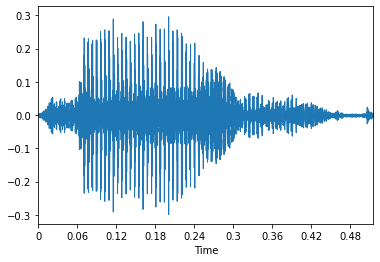

In [6]:
fig, ax = plt.subplots()
librosa.display.waveplot(X, sr=sr, ax= ax)

In [7]:
print(y_train[2])
ipd.Audio(X_train[2])


4


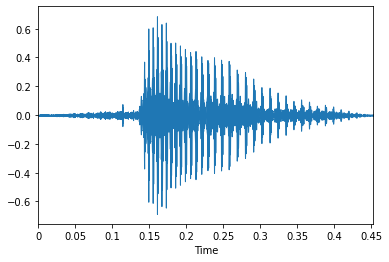

In [8]:
X, sr = librosa.load(X_train[2])
fig, ax = plt.subplots()
librosa.display.waveplot(X, sr=sr, ax= ax)

In [9]:
def plot_melSpec(X):
    y, sr = librosa.load(X)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
    fig, ax = plt.subplots()
    plt.figure(figsize=(20,8))
    S_dB = librosa.power_to_db(S, ref=np.max) 
    img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, ax=ax)
    fig.colorbar(img, ax=ax, format='%+2.0f dB')
    ax.set(title='Mel-frequency spectrogram')



In [10]:
print(y_train[3])
ipd.Audio(X_train[3])



1


/opt/conda/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/opt/conda/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


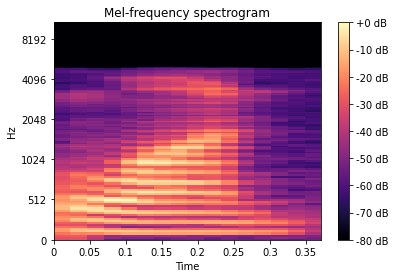

<Figure size 1440x576 with 0 Axes>

In [11]:
plot_melSpec(X_train[3])

# get MFCC coeficients

In [12]:
def getMFCC(X):
    y, sr = librosa.load(X, duration=5.0)
    print('duration  of audio is ', len(y)*(1/sr))
    S = librosa.feature.melspectrogram(y=y, sr=8000, n_fft=2048, hop_length=512, n_mels=128)
    print(S.shape)
    return librosa.feature.mfcc(S=librosa.power_to_db(S))

In [13]:
mfcc_coef1 = getMFCC(X_train[2])
mfcc_coef1.shape



duration  of audio is  0.4527891156462585
(128, 20)


(20, 20)

In [14]:
mfcc_coef2 = getMFCC(X_train[4])
mfcc_coef2.shape

duration  of audio is  0.5156462585034014
(128, 23)


(20, 23)

Above MFCC coeficients are different for 2 different audio files as they have different duration of audio

#  check minimum duration of audio present in data

In [15]:
#check minimum duration of audio present in data
def checkShortestAudio(DirPath='/kaggle/input/freespokendigitsdataset/recordings'):
    shortest= 1000
    shortestFile = ''
    for dirname, _, filenames in os.walk(DirPath):
        for filename in filenames:
            full_path = os.path.join(dirname, filename)
            y, sr = librosa.load(full_path)
            duration = len(y)*(1/sr)
            if(duration<shortest):
                shortest = duration
                shortestFile = filename
    return shortest,shortestFile
    

            

In [16]:
s,sf = checkShortestAudio()
s,sf

(0.1435374149659864, '6_yweweler_3.wav')

In [17]:
ipd.Audio('/kaggle/input/freespokendigitsdataset/recordings/6_yweweler_3.wav')

As seen above, shortest audio is for .14 seconds

In [18]:
#check minimum duration of audio present in data
def checkLongestAudio(DirPath='/kaggle/input/freespokendigitsdataset/recordings'):
    longest= 0
    longestFile = ''
    for dirname, _, filenames in os.walk(DirPath):
        for filename in filenames:
            full_path = os.path.join(dirname, filename)
            y, sr = librosa.load(full_path)
            duration = len(y)*(1/sr)
            if(duration>longest):
                longest = duration
                longestFile = filename
    return longest,longestFile

In [19]:
l,lf = checkLongestAudio()
l,lf

(2.282766439909297, '9_theo_16.wav')

In [20]:
ipd.Audio('/kaggle/input/freespokendigitsdataset/recordings/9_theo_16.wav')

As above, longest audio is of 2.28 seconds in which 9 is uttered

Get full data to analyze duration of audios in full dataset

In [21]:
def getFullData(DirPath='/kaggle/input/freespokendigitsdataset/recordings',sr=8000):
    Xfull = []
    y = []
    count =0;
    for dirname, _, filenames in os.walk(DirPath):
        for filename in filenames:
            full_path = os.path.join(dirname, filename)
            label = int(filename.split('_')[0])
            X, _ = librosa.load(full_path,sr=sr)
            Xfull.append(X)
            y.append(label)
            count = count +1
    return Xfull,y
    

In [22]:
X,y = getFullData()

In [23]:
print('length of x: ', len(X), ' and length of y: ',len(y),' and number of samples in first data of X :', len(X[0]), ' first data y ', y[0])

length of x:  3000  and length of y:  3000  and number of samples in first data of X : 3540  first data y  0


In [24]:
def plot_Audio_duration_bar(signals,rate=8000):
    sample_duration = [len(x)/rate for x in signals]
    plt.figure(figsize=(12,8))
    plt.hist(sample_duration)
    

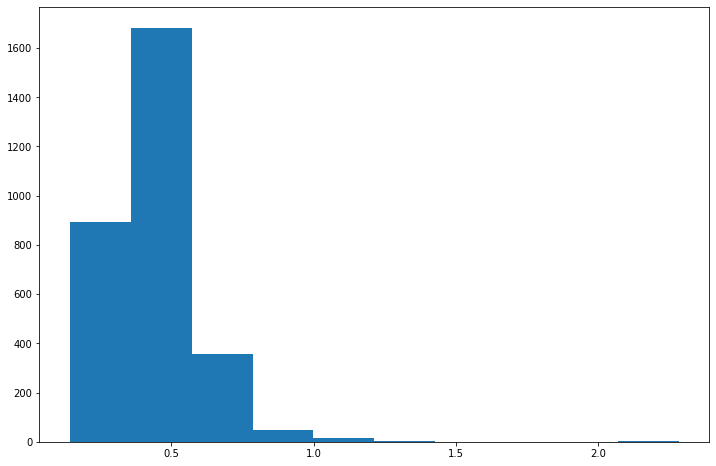

In [25]:
plot_Audio_duration_bar(X)

As seen above, most audios are around .25 to .6-7, very less after .75 and some outlieres are after 2 seconds

Get samples from audio for 1.0 seconds so that number of samples are same for audio duration >=1 and as for audio less than 1 seconds, pads the generated samples to make them of same size as others

In [26]:
def getUniformedLengthData(DirPath='/kaggle/input/freespokendigitsdataset/recordings',sr=8000,duration=1.0):
    N = int(sr*duration)
    X_data = np.ndarray(shape=(3000,N), dtype=float)
    y = np.ndarray(shape=(3000,1), dtype=int)
    count =0;
    for dirname, _, filenames in os.walk(DirPath):
        for filename in filenames:
            full_path = os.path.join(dirname, filename)
            label = int(filename.split('_')[0])
            X, _ = librosa.load(full_path,sr=sr,duration = 1.0)
            if(len(X) < N):
                        X = np.pad(X, (0, N - len(X)), constant_values = (0, 0))
            X_data[count] = X
            y[count] = label
            count = count+1
    return X_data,y
                        

In [27]:
X_data_u, y_u = getUniformedLengthData()
X_data_u.shape, y_u.shape

((3000, 8000), (3000, 1))

Above we have 3000 audio files data with 8000 samples each

In [28]:
X_df = pd.DataFrame(X_data_u)
y_df = pd.DataFrame(y_u)

In [29]:
def splitData(X,y,index):
    X1,X2 = X[:index],X[index:]
    y1,y2 = y[:index],y[index:]
    return (X1,y1),(X2,y2)

In [30]:
(X_train_full, y_train_full), (X_test, y_test) = splitData(X_df,y_df,2000)

In [31]:
X_train_full.shape,y_train_full.shape,X_test.shape,y_test.shape

((2000, 8000), (2000, 1), (1000, 8000), (1000, 1))

In [32]:
X_valid, X_train = X_train_full[1500:], X_train_full[:1500]
y_valid, y_train = y_train_full[1500:], y_train_full[:1500]

In [33]:
X_valid.shape,X_train.shape,y_valid.shape,y_train.shape, np.unique(y_df)

((500, 8000),
 (1500, 8000),
 (500, 1),
 (1500, 1),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

Lets run a dense network on samples of audio on amplitude based

In [34]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential([
    #keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [35]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-1),
              metrics=["accuracy"])

In [36]:
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
47/47 [==============================] - 2s 26ms/step - loss: 2.3053 - accuracy: 0.0842 - val_loss: 2.3078 - val_accuracy: 0.1160
Epoch 2/20
47/47 [==============================] - 0s 11ms/step - loss: 2.2628 - accuracy: 0.2155 - val_loss: 2.3151 - val_accuracy: 0.1020
Epoch 3/20
47/47 [==============================] - 1s 11ms/step - loss: 2.2234 - accuracy: 0.3006 - val_loss: 2.3128 - val_accuracy: 0.1180
Epoch 4/20
47/47 [==============================] - 1s 11ms/step - loss: 2.1550 - accuracy: 0.3707 - val_loss: 2.3198 - val_accuracy: 0.1200
Epoch 5/20
47/47 [==============================] - 1s 11ms/step - loss: 2.0974 - accuracy: 0.4103 - val_loss: 2.3213 - val_accuracy: 0.1280
Epoch 6/20
47/47 [==============================] - 1s 11ms/step - loss: 1.9882 - accuracy: 0.4760 - val_loss: 2.3154 - val_accuracy: 0.1300
Epoch 7/20
47/47 [==============================] - 1s 11ms/step - loss: 1.8840 - accuracy: 0.5123 - val_loss: 2.3606 - val_accuracy: 0.1340
Epoch 8/20
47

Prepare MFCC data to feed in dense network

In [37]:
def getMFCC(y):
    S = librosa.feature.melspectrogram(y=y, sr=8000, n_fft=2048, hop_length=512, n_mels=128)
    return librosa.feature.mfcc(S=librosa.power_to_db(S))

In [38]:
X_train_np= X_train.to_numpy()
X_train_np.shape,X_train_np[0].shape

((1500, 8000), (8000,))

In [39]:
# X_train_np[0] contains 8000 samples of audio, lets convert it into mfcc and see data size
mfcc= getMFCC(X_train_np[0])
mfcc.shape

(20, 16)

As above, after converting to MFCC will get 2-D data of (20,16) from array of 8000 values of samples

In [40]:
def convertToMFCCData(X):
    mfccData = np.ndarray(shape=(len(X),20,16), dtype=float)
    count = 0
    for i in range(0,len(X)):
        y = X[i]
        mfcc = getMFCC(y)
        mfccData[count] = mfcc
        count = count +1
    return mfccData
    

    

In [41]:
X_train_mfccs = convertToMFCCData(X_train_np)
X_train_mfccs.shape

(1500, 20, 16)

In [42]:
X_valid_np = X_valid.to_numpy()
X_valid_mfccs = convertToMFCCData(X_valid_np)
X_valid_mfccs.shape

(500, 20, 16)

Lets create a new model to be trained for MFCC data

In [43]:
modelMFCC = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[20, 16]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
     keras.layers.Dense(200, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [44]:
modelMFCC.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-4),
              metrics=["accuracy"])

In [45]:
history = modelMFCC.fit(X_train_mfccs, y_train, epochs=100,
                    validation_data=(X_valid_mfccs, y_valid))

Epoch 1/100
47/47 [==============================] - 1s 8ms/step - loss: 204.4030 - accuracy: 0.1377 - val_loss: 21.1481 - val_accuracy: 0.1700
Epoch 2/100
47/47 [==============================] - 0s 4ms/step - loss: 14.1490 - accuracy: 0.2640 - val_loss: 9.7486 - val_accuracy: 0.2640
Epoch 3/100
47/47 [==============================] - 0s 4ms/step - loss: 8.1000 - accuracy: 0.3537 - val_loss: 5.0376 - val_accuracy: 0.4020
Epoch 4/100
47/47 [==============================] - 0s 4ms/step - loss: 6.5122 - accuracy: 0.3703 - val_loss: 5.8784 - val_accuracy: 0.3440
Epoch 5/100
47/47 [==============================] - 0s 4ms/step - loss: 4.5088 - accuracy: 0.4446 - val_loss: 7.8121 - val_accuracy: 0.3440
Epoch 6/100
47/47 [==============================] - 0s 4ms/step - loss: 5.7935 - accuracy: 0.4082 - val_loss: 4.9134 - val_accuracy: 0.4440
Epoch 7/100
47/47 [==============================] - 0s 4ms/step - loss: 4.1225 - accuracy: 0.4498 - val_loss: 2.2203 - val_accuracy: 0.5900
Epoch 8/1

We reached training accuracy 99.23% and validation accuracy 90% in 100 epochs. Lets try to predict a value

In [46]:
sample_testing = X_valid_mfccs[200:202]
np.argmax(modelMFCC.predict(sample_testing), axis=-1)


array([0, 8])

In [47]:
y_testing = y_valid.to_numpy()
ys = y_testing[200:202]
ys


array([[0],
       [8]])

In [48]:
X_test_np = X_test.to_numpy()
X_test_mfcc = convertToMFCCData(X_test_np)

In [49]:
modelMFCC.evaluate(X_test_mfcc, y_test)

32/32 [==============================] - 0s 1ms/step - loss: 0.4168 - accuracy: 0.9190


[0.4167971909046173, 0.9190000295639038]

As above, we got 90% accuracy on test audio set

lets test it for a audio file

In [50]:
XSample, _ = librosa.load('/kaggle/input/freespokendigitsdataset/recordings/9_theo_16.wav',sr=8000, duration=1.0)
XSample= np.expand_dims(XSample, axis=0)
XSample.shape
XSampleMFCC = convertToMFCCData(XSample)
XSampleMFCC.shape

(1, 20, 16)

In [51]:
np.argmax(modelMFCC.predict(XSampleMFCC), axis=-1)

array([9])

In [52]:
ipd.Audio('/kaggle/input/freespokendigitsdataset/recordings/4_lucas_16.wav')

In [53]:
XSample, _ = librosa.load('/kaggle/input/freespokendigitsdataset/recordings/4_lucas_16.wav',sr=8000, duration=1.0)

XSample.shape

(3622,)

In [54]:
XSample = np.pad(XSample, (0, 8000 - len(XSample)), constant_values = (0, 0))
XSample= np.expand_dims(XSample, axis=0)
XSampleMFCC = convertToMFCCData(XSample)

In [55]:
np.argmax(modelMFCC.predict(XSampleMFCC), axis=-1)

array([4])